* SeniorCitizen : 고령자 여부
* tenure : 서비스에 가입한 기간

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [99]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [100]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# info로 데이터타입 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [102]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

In [103]:
# 수치데이터에 대한 요약 보기
df.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [106]:
# 각 컬럼들의 값 종류 한눈에 확인하기
for i in df.columns[:]:
    if df[i].dtype == 'object':
        print(i,df[i].value_counts().index.values)

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['Fiber optic' 'DSL' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'Two year' 'One year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [107]:
# Yes, No, No_internet_service 로 나눠져있는 컬럼들 넣기
No_internet_cols = []

for column in df.columns[1:]:
    if df[column].dtype == 'object':
        if "No internet service" in df[column].values:
            No_internet_cols.append(column)

In [108]:
No_internet_cols

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [110]:
# "No internet service" 와 "No phone service"를 "No" 로 바꾸어 보기
for i in No_internet_cols :
    df[i].replace("No internet service",'No',inplace=True)
# No phone service 도 No 로 바꾸기
df["MultipleLines"].replace("No phone service","No",inplace=True)

In [111]:
# 잘 바뀌었는지 확인
for i in df.columns[:]:
    if df[i].dtype == 'object':
        print(i,df[i].value_counts().index.values)

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes']
InternetService ['Fiber optic' 'DSL' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['No' 'Yes']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'Two year' 'One year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [112]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
# tenure와 totalcharge가 연관이 크기 때문에 한 컬럼 삭제
df.drop('TotalCharges',axis=1,inplace=True)

In [114]:
# tenure가 0인 값 없애기
df = df[df['tenure'] != 0]

In [115]:
df.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


<Axes: >

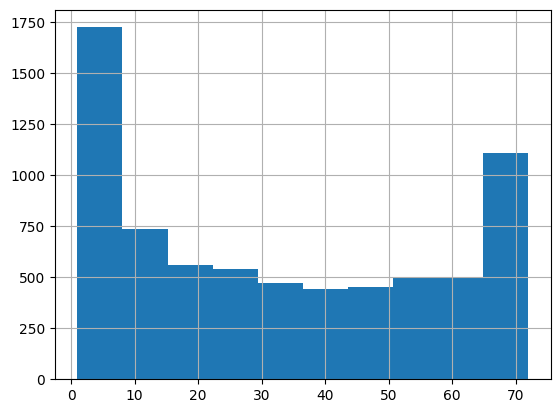

In [116]:
# tenure 분포 확인
df["tenure"].hist()

* tenure을 범주형으로 나누어보기

In [118]:
# 0-75 까지 5개의 그룹으로 나누기
df["0-15"] = df["tenure"] < 16
df["16-30"] = (df["tenure"] >= 16) & (df["tenure"] <= 30)
df["31-45"] = (df["tenure"] >= 31) & (df["tenure"] <= 45)
df["46-60"] = (df["tenure"] >= 46) & (df["tenure"] <= 60)
df["61-75"] = df["tenure"] > 60
df[["tenure","0-15","16-30","31-45","46-60","61-75"]].head()

,tenure,0-15,16-30,31-45,46-60,61-75
customerID,,,,,,
7590-VHVEG,1,True,False,False,False,False
5575-GNVDE,34,False,False,True,False,False
3668-QPYBK,2,True,False,False,False,False
7795-CFOCW,45,False,False,True,False,False
9237-HQITU,2,True,False,False,False,False


In [119]:
# 하나의 컬럼에 넣어주기
df["tenure_split"] = df[["0-15","16-30","31-45","46-60","61-75"]].idxmax(axis=1)
df[["tenure","tenure_split"]].head()

,tenure,tenure_split
customerID,,
7590-VHVEG,1,0-15
5575-GNVDE,34,31-45
3668-QPYBK,2,0-15
7795-CFOCW,45,31-45
9237-HQITU,2,0-15


In [120]:
# 그룹을 나눴으니 tenure는 삭제
df.drop('tenure',axis=1,inplace=True)

In [122]:
# 정답값인 Churn의 개수 확인
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [123]:
# Churn의 값을 Yes, No가 아닌 0,1로 만들기
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [124]:
# dummies를 이용해서 인코딩후 int형으로 다 바꾸기
df_encoded = pd.get_dummies(df)
df_encoded = df_encoded.astype(int)
df_encoded.head()

,SeniorCitizen,MonthlyCharges,Churn,0-15,16-30,31-45,46-60,61-75,gender_Female,gender_Male,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_split_0-15,tenure_split_16-30,tenure_split_31-45,tenure_split_46-60,tenure_split_61-75
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,29,0,1,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
5575-GNVDE,0,56,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,0,53,1,1,0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
7795-CFOCW,0,42,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,70,1,1,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


<ipython-input-125-833035656e06>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_encoded.MonthlyCharges[(df_encoded["Churn"] == 0) ],
<ipython-input-125-833035656e06>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_encoded.MonthlyCharges[(df_encoded["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

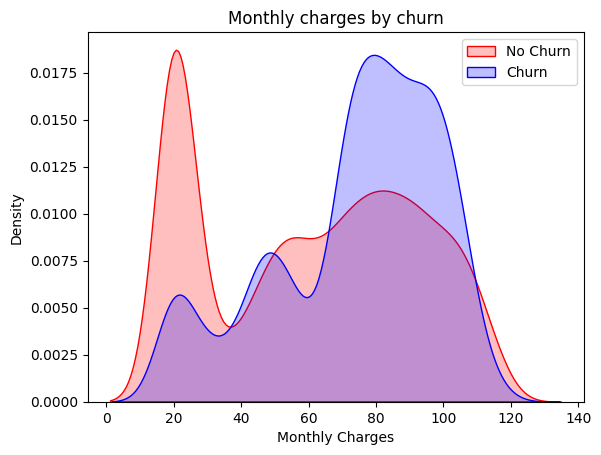

In [125]:
# 신기해서 가져와본 그래프. 확실히 Monthly Charges가 클수록 Churn이 많다.
Mth = sns.kdeplot(df_encoded.MonthlyCharges[(df_encoded["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_encoded.MonthlyCharges[(df_encoded["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

In [126]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7032 non-null   int64
 1   MonthlyCharges                           7032 non-null   int64
 2   Churn                                    7032 non-null   int64
 3   0-15                                     7032 non-null   int64
 4   16-30                                    7032 non-null   int64
 5   31-45                                    7032 non-null   int64
 6   46-60                                    7032 non-null   int64
 7   61-75                                    7032 non-null   int64
 8   gender_Female                            7032 non-null   int64
 9   gender_Male                              7032 non-null   int64
 10  Partner_No                               7032 non-null   int64

In [128]:
# 훈련시킬 데이터프레임에서 정답값인 Churn은 없애기
X = df_encoded.drop('Churn',axis=1)
X.head(5)

,SeniorCitizen,MonthlyCharges,0-15,16-30,31-45,46-60,61-75,gender_Female,gender_Male,Partner_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_split_0-15,tenure_split_16-30,tenure_split_31-45,tenure_split_46-60,tenure_split_61-75
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,29,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
5575-GNVDE,0,56,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
3668-QPYBK,0,53,1,0,0,0,0,0,1,1,...,1,0,0,0,1,1,0,0,0,0
7795-CFOCW,0,42,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
9237-HQITU,0,70,1,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0


In [129]:
# 정답값 설정
y = df['Churn']
y

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7032, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
                        X,y,test_size=0.2,random_state=42)

In [131]:
# 회귀모델을 이용해 학습
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_predict[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 0])

In [132]:
model.score(X_test,y_test)

0.7917555081734187

` churn 의 "Yes" 와 "No" 개수 차이가 많이 났으므로 샘플링 기술 이용해보기 `

SMOTEENN과 SMOTE는 모두 불균형한 클래스 분포를 가진 데이터셋에서 사용되는 샘플링 기술입니다. 그러나 두 기술 간에는 중요한 차이가 있습니다.

1. **샘플링 방식**:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: 소수 클래스의 샘플을 기존의 샘플과의 거리를 기반으로 합성하여 데이터셋을 오버샘플링합니다. 이 방식은 소수 클래스의 샘플을 증가시키는 데 중점을 두고 있습니다.
   - **SMOTEENN (SMOTE combined with Edited Nearest Neighbors)**: 먼저 SMOTE를 사용하여 소수 클래스의 샘플을 합성하여 데이터셋을 오버샘플링한 후, ENN (Edited Nearest Neighbors)을 사용하여 오버샘플링된 데이터에서 잘못 분류된 이웃 샘플을 제거하여 데이터를 정제합니다.

2. **목적**:
   - **SMOTE**: 데이터셋의 클래스 불균형을 해소하기 위해 소수 클래스의 샘플을 증가시킵니다.
   - **SMOTEENN**: SMOTE를 사용하여 오버샘플링을 수행한 후, ENN을 사용하여 데이터를 정제하므로, 클래스 불균형을 해소하면서 동시에 데이터를 정제하여 모델의 성능을 향상시킵니다.

3. **실제 적용**:
   - SMOTE는 데이터를 오버샘플링하는 데 사용되며, 클래스 불균형을 해소하는 데 주로 사용됩니다.
   - SMOTEENN은 SMOTE를 사용하여 오버샘플링을 수행한 후, ENN을 사용하여 데이터를 정제하여 클래스 불균형을 해소하고 노이즈를 제거하는 데 사용됩니다.

따라서 SMOTEENN은 SMOTE보다 더 세밀한 데이터 정제를 수행하여 모델의 성능을 향상시키는 데 도움이 될 수 있습니다. 하지만 데이터의 특성에 따라 어떤 방법이 더 적합한지는 다를 수 있으므로, 실험을 통해 확인하는 것이 중요합니다.

In [140]:
# from imblearn.combine import SMOTEENN

# smote = SMOTEENN()
# X_resampled, y_resampled = smote.fit_resample(X, y)

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [141]:
X2_train,X2_test,y2_train,y2_test=train_test_split(
    X_resampled, y_resampled,test_size=0.25,random_state=42)

In [142]:
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X2_train, y2_train)

y_predict_smote = model_smote.predict(X2_test)
y_predict_smote[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 0])

In [143]:
model_smote.score(X_test,y_test)

0.7860696517412935

1) SMOTEENN 을 이용할 경우

- 0.7341862117981521

2) SMOTE 를 이용할 경우

- 0.7860696517412935

3) 처음 회귀모델만 사용했을 경우

- 0.7917555081734187

왜 더 안좋아졌을까..?